
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 1</p>
## <p style="text-align: center;">Total points: 100</p>
## <p style="text-align: center;">Due: Tuesday, September 17 submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Challenges in Data Science (10 pts)

Refer to the Domino guide under Modules --> Additional Resources

Section 2 describes 8 Challenges. You may have personally encountered or heard of somebody else who encountered some of these challenge. If so,  please write 1-2 paragraphs on what situation was encountered and how it mapped into one the mentioned challenges. If not, think of a hypothetical case and do the same exercise. 


## Answer
I had a conversation with a data scientist at Chevron who was a part of a team that was tasked to find low-hanging fruit and address such issues on short timelines, typically 6 months at the longest. Because the team was expected to provide solutions with such quick turnaround, they eventually realized that while they were solving a few business problems at a time, they did not solve enough problems at once.

The energy/oil and gas industry is an industry that collects tremendous amounts of data every day, between the company trading floor, refineries, and pipelines the stream of data is almost endless. The team could only tackle a few problems at a time often in only one area of the company. As such, Chevron would later establish another team within the data science department that tackled longer horizon projects and sought to address incoming issues while the other team continued to solve what problems they could.



# Question 2: MLE Estimate (5+10+10 points)

Consider a coin tossing experiment where a biased coin is tossed repeatedly for $n$ times with independence in successive tosses. 
If we record the outcome of each toss as $X_{i}$, for $i \in \{1,2,3,....,n\}$ as follows

$  
X_{i} = 
     \begin{cases}
       \text{1,} &\quad\text{if $i^{th}$ toss results in $Heads$,}\\
       \text{0,} &\quad\text{otherwise.} \\ 
     \end{cases}
$

then $X_{1}, X_{2}, .... X_{n}$ will be a sequence of $0$'s and $1$'s. Assume that for this coin $P(Heads) = p$, which of course is not known to the experimenter. 

1. The log-likelihood function of the observations, as discussed in the class, denotes the probability of occurrence of the observations. Write the log-likelihood function for the set of observations $X_{1}, X_{2}, .... X_{n}$. 

2. Compute an MLE estimate of $p$.

3. Check if the obtained estimate is unbiased.


## Answer



# Question 3: Multiple Linear Regression in Python (30 pts)

Use the following code to import the California housing prices dataset and linear models in python. The dataset is taken from https://www.kaggle.com/camnugent/california-housing-prices/version/1. I have removed the categorical variables and rows with missing variables to make it easier to run the models. 


In [2]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None


train_df = pd.read_csv("reduced_data.csv")
X = train_df.drop(['median_house_value'],axis=1)
Y = train_df['median_house_value']

a. (2 pts) Print the shape (number of rows and columns) of the feature matrix X, and print the first 5 rows.

b.  (6 pts) Using ordinary least squares, fit a multiple linear regression (MLR) on all the feature variables using the entire dataset. Report the regression coefficient of each input feature and evaluate the model using mean absolute error (MAE).  Example of ordinary least squares in Python is shown in Section 1.1.1 of http://scikit-learn.org/stable/modules/linear_model.html.

c.  (6 pts) Split the data into a training set and a test set, using the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with test_size = 0.30 and random_state = 11. Fit an MLR using the training set.  Evaluate the trained model using the training set and the test set, respectively.  Compare the two MAE values thus obtained.

d.  (5 pts) Calculate the pearson correlation matrix of the independent variables in the training set (you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)). Report the variables which have magnitude of correlation greater than 0.9 w.r.t the variable 'households'. 

e.  (6 pts) Add the following independent variables to both train and test sets:
1. average_bedrooms = total_bedrooms/households
2. average_rooms = total_rooms/households
3. average_population = total_rooms/households

Recalculate the correlation matrix. What do you observe about the correlation values of the above new variables?

f. (5 pts) Fit an MLR on the new train data (with additional independent variables) and report the MAE on the new train and test sets.

## Answer

## (a)

In [7]:
print X.shape
X.head(5)

(20433, 8)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462


## (b)

In [10]:
MLR1 = linear_model.LinearRegression()
MLR1.fit(X, Y)

print("Coefficients: {}".format(MLR1.coef_))

print("Mean Absolute Error: %.2f"
      % mean_absolute_error(Y, MLR1.predict(X)))

Coefficients: [-4.27301205e+04 -4.25097369e+04  1.15790031e+03 -8.24972507e+00
  1.13820707e+02 -3.83855780e+01  4.77013513e+01  4.02975217e+04]
Mean Absolute Error: 50799.63


## (c)

In [11]:
from sklearn.model_selection import train_test_split

MLR2 = linear_model.LinearRegression()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 11)
MLR2.fit(X_train, Y_train)

Y_train_pred = MLR2.predict(X_train)
Y_test_pred = MLR2.predict(X_test)

print("Training Set MAE: %.2f"
      % mean_absolute_error(Y_train, Y_train_pred))
print("Test Set MAE: %.2f"
      % mean_absolute_error(Y_test, Y_test_pred))

Training Set MAE: 50749.10
Test Set MAE: 50916.74


## (d)

In [13]:
X_train.corr(method = "pearson")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
longitude,1.000000,-0.925627,-0.111272,0.042788,0.069305,0.101596,0.056116,-0.020466
latitude,-0.925627,1.000000,0.013098,-0.034147,-0.066424,-0.109600,-0.070537,-0.074943
housing_median_age,-0.111272,0.013098,1.000000,-0.356534,-0.316644,-0.294652,-0.298702,-0.115736
total_rooms,0.042788,-0.034147,-0.356534,1.000000,0.927454,0.859323,0.916556,0.198486
total_bedrooms,0.069305,-0.066424,-0.316644,0.927454,1.000000,0.880929,0.979547,-0.013082
population,0.101596,-0.109600,-0.294652,0.859323,0.880929,1.000000,0.910283,-0.001523
households,0.056116,-0.070537,-0.298702,0.916556,0.979547,0.910283,1.000000,0.008033
median_income,-0.020466,-0.074943,-0.115736,0.198486,-0.013082,-0.001523,0.008033,1.000000


Independent variables having correlation greater than 0.9 w.r.t 'households': 

total_rooms, total_bedrooms, population

## (e)

In [15]:
X_train['average_bedrooms'] = X_train['total_bedrooms']/X_train['households']
X_train['average_rooms'] = X_train['total_rooms']/X_train['households']
X_train['average_pop'] = X_train['population']/X_train['households']

X_test['average_bedrooms'] = X_test['total_bedrooms']/X_test['households']
X_test['average_rooms'] = X_test['total_rooms']/X_test['households']
X_test['average_pop'] = X_test['population']/X_test['households']

X_train.corr(method='pearson')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,average_bedrooms,average_rooms,average_pop
longitude,1.000000,-0.925627,-0.111272,0.042788,0.069305,0.101596,0.056116,-0.020466,0.017548,-0.027099,0.011811
latitude,-0.925627,1.000000,0.013098,-0.034147,-0.066424,-0.109600,-0.070537,-0.074943,0.062059,0.104294,-0.002330
housing_median_age,-0.111272,0.013098,1.000000,-0.356534,-0.316644,-0.294652,-0.298702,-0.115736,-0.077163,-0.158539,0.012569
total_rooms,0.042788,-0.034147,-0.356534,1.000000,0.927454,0.859323,0.916556,0.198486,0.036170,0.146227,-0.031031
total_bedrooms,0.069305,-0.066424,-0.316644,0.927454,1.000000,0.880929,0.979547,-0.013082,0.054525,0.004237,-0.036556
population,0.101596,-0.109600,-0.294652,0.859323,0.880929,1.000000,0.910283,-0.001523,-0.062026,-0.072951,0.077684
households,0.056116,-0.070537,-0.298702,0.916556,0.979547,0.910283,1.000000,0.008033,-0.050050,-0.081950,-0.034892
median_income,-0.020466,-0.074943,-0.115736,0.198486,-0.013082,-0.001523,0.008033,1.000000,-0.059447,0.350785,0.000417
average_bedrooms,0.017548,0.062059,-0.077163,0.036170,0.054525,-0.062026,-0.050050,-0.059447,1.000000,0.833841,-0.002194
average_rooms,-0.027099,0.104294,-0.158539,0.146227,0.004237,-0.072951,-0.081950,0.350785,0.833841,1.000000,0.003475


Observation: The new variables do not have a strong correlation with most other variables. The only exception is between avg_bedrooms and avg_rooms, but this is expected: a household with more rooms is likely to have more bedrooms as well.

## (f)

In [16]:
MLR3 = linear_model.LinearRegression()

MLR3.fit(X_train, Y_train)
Y_train_pred = MLR3.predict(X_train)
Y_test_pred = MLR3.predict(X_test)

print("Training Set MAE: %.2f"
      % mean_absolute_error(Y_train, Y_train_pred))
print("Test Set MAE: %.2f"
      % mean_absolute_error(Y_test, Y_test_pred))

Training Set MAE: 50474.27
Test Set MAE: 50783.97


# Question 4: Ridge and Lasso Regression (30 points)


Using the same data from before, in this question you will explore the application of Lasso and Ridge regression using sklearn package in Python. Use the same train and test data with additional augmented columns from before. Scale the data so that each of the dependent variables have zero mean and unit variance. You can use the [sklearn.preprocessing.scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html) function for this.

In [17]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV
from sklearn.preprocessing import scale

X_train = scale(X_train)
Y_train = scale(Y_train)
X_test = scale(X_test)
Y_test = scale(Y_test)

1) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-2}$. In Python, you can consider this range of values as follows:

      import numpy as np

      alphas =  10**np.linspace(10,-2,100)*0.5

  Report the best chosen $\lambda$ based on cross validation. The cross validation should happen on your training data using  average MAE as the scoring metric. (8pts)

2) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot. What do you qualitatively observe when value of the regularization parameter is changed? (7pts)

3) Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MAE) on the test data for each. (5pts)

4) Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficeints for all variables. (5pts)

5) Why did we have to scale the data before regularization? (5pts)


## Answer



## 1

In [23]:
from sklearn.model_selection import GridSearchCV

lasso = Lasso(random_state=0, max_iter=10000)
ridge = Ridge(random_state=0, max_iter=10000)
alphas =  10**np.linspace(10,-2,100)*0.5
tuned_parameters = [{'alpha': alphas}]
n_folds = 5

lassomodel = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False,
                          scoring='neg_mean_absolute_error')
lassomodel.fit(X_train, Y_train)
print('Lasso optimal alpha: %.3f' % lassomodel.best_params_["alpha"])

ridgemodel = GridSearchCV(ridge, tuned_parameters, cv=n_folds, refit=False, 
                          scoring='neg_mean_absolute_error')
ridgemodel.fit(X_train, Y_train)
print('Ridge optimal alpha: %.3f' % ridgemodel.best_params_["alpha"])

Lasso optimal alpha: 0.005
Ridge optimal alpha: 37.823


## 2

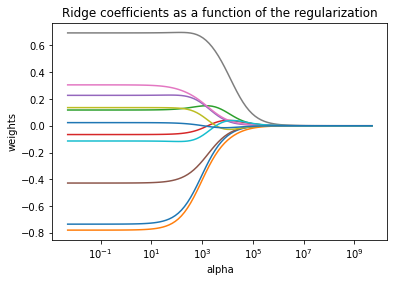

In [24]:
#Plotting ridge coefficents as a function of the regularization
import matplotlib.pyplot as plt
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False, random_state=0, max_iter=10000)
    ridge.fit(X_train, Y_train)
    coefs.append(ridge.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

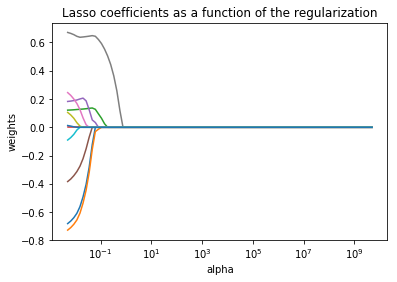

In [20]:
#Plotting lasso coefficents as a function of the regularization
coefs = []
for a in alphas:
    lasso = Lasso(alpha=a, fit_intercept=False, random_state=0, max_iter=10000)
    lasso.fit(X_train, Y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

## 3

In [26]:
# Least Squares Regression
MLR = linear_model.LinearRegression()
MLR.fit(X_train, Y_train)
MLRpred = MLR.predict(X_test)
print('Least Squares MAE: %.5f' % mean_absolute_error(Y_test, MLRpred))

# Lasso
lassoq3 = Lasso(alpha = .005, fit_intercept=False, random_state=0, max_iter=10000)
lassoq3.fit(X_train, Y_train)
lassopred = lassoq3.predict(X_test)
print('LASSO MAE: %.5f' % mean_absolute_error(Y_test, lassopred))

# Ridge
ridgeq3 = Ridge(alpha = 37.823166377731454, fit_intercept=False, random_state=0, max_iter=10000)
ridgeq3.fit(X_train, Y_train)
ridgepred = ridgeq3.predict(X_test)
print('Ridge MAE: %.5f' % mean_absolute_error(Y_test, ridgepred))

Least Squares MAE: 0.44539
LASSO MAE: 0.44689
Ridge MAE: 0.44519


## 4

In [28]:
#Fitting LassoCV
lasso_cv = LassoCV(alphas=None, cv=10, max_iter=10000)
model = lasso_cv.fit(X_train, Y_train)

In [29]:
#Print the alpha parameter obtained above
print('LassoCV alpha obtained: %.5f' % model.alpha_)

LassoCV alpha obtained: 0.00139


In [30]:
#Fit lasso using the above alpha and report MAE on Test.
lassoq4 = Lasso(alpha = model.alpha_, fit_intercept=False, random_state=0,
               max_iter=10000)
lassoq4.fit(X_train, Y_train)
q4pred = lassoq4.predict(X_test)
print('The LassoCV MAE: %.5f' % mean_absolute_error(Y_test, q4pred))

The LassoCV MAE: 0.44559


## 5

## Answer
Because lasso and ridge penalize terms based on the size of the weights we need to scale our data. The shrinking would not be fair otherwise since the optimization problem relies on minimizing the MSE and larger weights by magnitude will contribute to the penalty by a larger than intended amount.

# Question 5 (5pts)

How do you think the performance of your model varies in the train and test set as you increase(decrease) the number of examples in the training dataset? Explain why does it change in a particular way.

## Answer
We expect the training error of the model to be downward sloping; i.e as number of data points increases the model decreases in training error. However, test error is generally U-shaped where we expect test error to decrease to a certain point before increasing again as the number of data points increases.

This is because as we increase the number of examples the model will begin to 'overfit'. The model will begin to interpret random noise as a signal. We displayed such an example in our Thursday lecture where a high degree polynomial fits to the data points perfectly, but the curve is too wobbly and thus not indicative of the true data-generating process we expect.